## Integrator
Alejandro Barrientos - Luis Miguel Caicedo - Alejandro Henao

## Business Problem
It is vital that credit card companies are able to
identify fraudulent credit card transactions so that customers
are not charged for items that they did not purchase. Such
problems can be tackled with Data Science and its importance,
along with Machine Learning, cannot be overstated. This
project intends to illustrate the modelling of a data set using
machine learning with Credit Card Fraud Detection.

## Importing modules

In [ ]:
# Useful
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

#sklearn

# Create the cross validation framework 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#imblearn
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

#xgboost
import xgboost as xgb

# Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading file

In [ ]:
#read the dataset
data = pd.read_csv("Data3_creditcard.csv")
# read the first 5 and last 5 rows of the data
data.head().append(data.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Data description

Fraudulent Cases: 492
Valid Transactions: 284315
Proportion of Fraudulent Cases: 0.001727485630620034


<AxesSubplot:ylabel=' '>

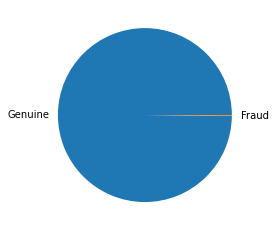

In [ ]:
# check for relative proportion 
print("Fraudulent Cases: " + str(len(data[data["Class"] == 1])))
print("Valid Transactions: " + str(len(data[data["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(data[data["Class"] == 1])/ data.shape[0]))

# To see how small are the number of Fraud transactions
data_pi = data.copy()
data_pi[" "] = np.where(data_pi["Class"] == 1 ,  "Fraud", "Genuine")

# plot a pie chart
%matplotlib inline
data_pi[" "].value_counts().plot(kind="pie")

In [ ]:
# check for data description
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


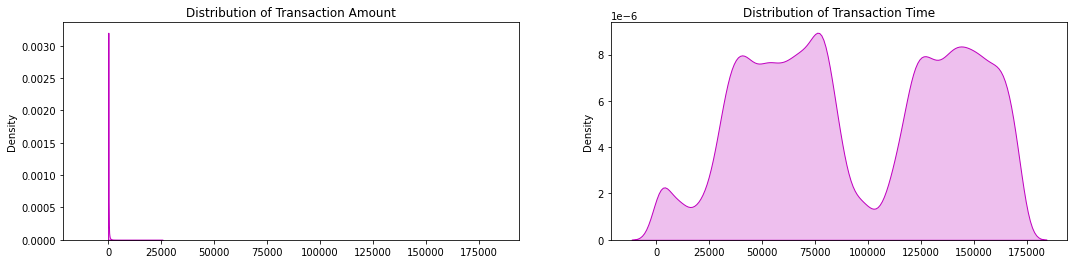

In [ ]:
# plot the named features 
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

amount_val = data['Amount'].values # values
time_val = data['Time'].values # values

sns.distplot(amount_val, hist=False, color="m", kde_kws={"shade": True}, ax=axes[0]).set_title('Distribution of Transaction Amount')
sns.distplot(time_val, hist=False, color="m", kde_kws={"shade": True}, ax=axes[1]).set_title('Distribution of Transaction Time')

plt.show()

In [ ]:
print("Average Amount in a Fraudulent Transaction: " + str(data[data["Class"] == 1]["Amount"].mean()))
print("Average Amount in a Valid Transaction: " + str(data[data["Class"] == 0]["Amount"].mean()))

Average Amount in a Fraudulent Transaction: 122.21132113821139
Average Amount in a Valid Transaction: 88.29102242231328


In [ ]:
print("Summary of the feature - Amount" + "\n-------------------------------")
print(data["Amount"].describe())

Summary of the feature - Amount
-------------------------------
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Functions

In [ ]:

def model_classifier(x_T, y_T, x_t, y_t, kf, type='decision tree'):
    '''
    Function to iterate through all models with default parameters.
    '''
    if type == 'decision tree':
        m = DecisionTreeClassifier()
    if type == 'random forest':
        m =  RandomForestClassifier()
    if type == 'AdaBoost':
        m = AdaBoostClassifier()
    if type == 'xgb':
        m = xgb.XGBClassifier()
    
    m.fit(x_T, y_T)
    cv_score = cross_val_score(m, x_T, y_T, scoring = 'recall', cv = kf)
    y_test_predict = m.predict(x_t)
    recall = recall_score(y_t, y_test_predict)
    accuracy = accuracy_score(y_t, y_test_predict)
    f_score = f1_score(y_t, y_test_predict)
    precision = precision_score(y_t, y_test_predict)

    return m, cv_score, recall, accuracy, f_score, precision

## Balancing

In [ ]:
# Separate response and features
y = data["Class"] # target 
X = data.iloc[:,:-1]

model_list = ['decision tree', 'random forest', 'AdaBoost', 'xgb']
kf = StratifiedKFold(n_splits=5, shuffle = False)


### No Balance

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.2, random_state = 42)

In [ ]:
m_nobal_dt, cv_score_nobal_dt, recall_nobal_dt, accuracy_nobal_dt, f_score_nobal_dt, precision_nobal_dt = model_classifier(X_train, y_train, X_test, y_test, kf, type='decision tree')
m_nobal_rf, cv_score_nobal_rf, recall_nobal_rf, accuracy_nobal_rf, f_score_nobal_rf, precision_nobal_rf = model_classifier(X_train, y_train, X_test, y_test, kf,type='random forest')
m_nobal_adb, cv_score_nobal_adb, recall_nobal_adb, accuracy_nobal_adb, f_score_nobal_adb, precision_nobal_adb = model_classifier(X_train, y_train, X_test, y_test, kf, type='AdaBoost')
m_nobal_xgb, cv_score_nobal_xgb, recall_nobal_xgb, accuracy_nobal_xgb, f_score_nobal_xgb, precision_nobal_xgb = model_classifier(X_train, y_train, X_test, y_test, kf, type='xgb')


In [ ]:
m_nobal_dt, cv_score_nobal_dt, recall_nobal_dt, accuracy_nobal_dt, f_score_nobal_dt, precision_nobal_dt

(DecisionTreeClassifier(),
 array([0.82051282, 0.72151899, 0.74683544, 0.78481013, 0.79746835]),
 0.7959183673469388,
 0.9990871107053826,
 0.75,
 0.7090909090909091)

In [ ]:
m_nobal_rf, cv_score_nobal_rf, recall_nobal_rf, accuracy_nobal_rf, f_score_nobal_rf, precision_nobal_rf

(RandomForestClassifier(),
 array([0.78205128, 0.70886076, 0.72151899, 0.78481013, 0.82278481]),
 0.7755102040816326,
 0.9995786664794073,
 0.8636363636363635,
 0.9743589743589743)

In [ ]:
m_nobal_adb, cv_score_nobal_adb, recall_nobal_adb, accuracy_nobal_adb, f_score_nobal_adb, precision_nobal_adb

(AdaBoostClassifier(),
 array([0.75641026, 0.5443038 , 0.6835443 , 0.72151899, 0.72151899]),
 0.7244897959183674,
 0.9993153330290369,
 0.7845303867403315,
 0.8554216867469879)

In [ ]:
m_nobal_xgb, cv_score_nobal_xgb, recall_nobal_xgb, accuracy_nobal_xgb, f_score_nobal_xgb, precision_nobal_xgb

(XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, ...),
 array([0.82051282, 0.74683544, 0.7721519 , 0.79746835, 0.82278481]),
 0.7959183673469388,
 0.9996313331694814,
 0.8813559322033897,
 0.9873417721518988)

### SMOTE



In [ ]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

In [ ]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
y_smote.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
        X_smote, y_smote, test_size = 0.2, random_state = 42)


In [ ]:
m_smote_dt, cv_score_smote_dt, recall_smote_dt, accuracy_smote_dt, f_score_smote_dt, precision_smote_dt = model_classifier(X_train, y_train, X_test, y_test, kf, type='decision tree')

In [ ]:
m_smote_rf, cv_score_smote_rf, recall_smote_rf, accuracy_smote_rf, f_score_smote_rf, precision_smote_rf = model_classifier(X_train, y_train, X_test, y_test, kf,type='random forest')

In [ ]:
m_smote_adb, cv_score_smote_adb, recall_smote_adb, accuracy_smote_adb, f_score_smote_adb, precision_smote_adb = model_classifier(X_train, y_train, X_test, y_test, kf, type='AdaBoost')

In [ ]:
m_smote_xgb, cv_score_smote_xgb, recall_smote_xgb, accuracy_smote_xgb, f_score_smote_xgb, precision_smote_xgb = model_classifier(X_train, y_train, X_test, y_test, kf, type='xgb')

In [ ]:
m_smote_dt, cv_score_smote_dt, recall_smote_dt, accuracy_smote_dt, f_score_smote_dt, precision_smote_dt

(DecisionTreeClassifier(),
 array([0.99857042, 0.99894431, 0.9986584 , 0.99896631, 0.99872435]),
 0.999280398764392,
 0.9987337987795227,
 0.9987369972108688,
 0.998194186331919)

In [ ]:
m_smote_rf, cv_score_smote_rf, recall_smote_rf, accuracy_smote_rf, f_score_smote_rf, precision_smote_rf

(RandomForestClassifier(),
 array([0.99997801, 1.        , 1.        , 0.99997801, 1.        ]),
 0.999982448750351,
 0.9998944832316269,
 0.9998947017426862,
 0.9998069701330151)

In [ ]:
m_smote_adb, cv_score_smote_adb, recall_smote_adb, accuracy_smote_adb, f_score_smote_adb, precision_smote_adb

(AdaBoostClassifier(),
 array([0.97468549, 0.97404768, 0.97657693, 0.97519134, 0.9718917 ]),
 0.9744804830103904,
 0.9810069816928407,
 0.980919402141267,
 0.9874439780892083)

In [ ]:
m_smote_xgb, cv_score_smote_xgb, recall_smote_xgb, accuracy_smote_xgb, f_score_smote_xgb, precision_smote_xgb

(XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, ...),
 array([0.99997801, 0.99997801, 0.99997801, 1.        , 1.        ]),
 1.0,
 0.9998856901675958,
 0.999885929890756,
 0.9997718858025233)

### Tomek Links

In [ ]:
undersample = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = undersample.fit_resample(X, y)

In [ ]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
y_tl.value_counts()

0    284244
1       492
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
        X_tl, y_tl, test_size = 0.2, random_state = 42)

In [ ]:
m_tl_dt, cv_score_tl_dt, recall_tl_dt, accuracy_tl_dt, f_score_tl_dt, precision_tl_dt = model_classifier(X_train, y_train, X_test, y_test, kf, type='decision tree')
m_tl_rf, cv_score_tl_rf, recall_tl_rf, accuracy_tl_rf, f_score_tl_rf, precision_tl_rf = model_classifier(X_train, y_train, X_test, y_test, kf,type='random forest')
m_tl_adb, cv_score_tl_adb, recall_tl_adb, accuracy_tl_adb, f_score_tl_adb, precision_tl_adb = model_classifier(X_train, y_train, X_test, y_test, kf, type='AdaBoost')
m_tl_xgb, cv_score_tl_xgb, recall_tl_xgb, accuracy_tl_xgb, f_score_tl_xgb, precision_tl_xgb = model_classifier(X_train, y_train, X_test, y_test, kf, type='xgb')

In [ ]:
m_tl_dt, cv_score_tl_dt, recall_tl_dt, accuracy_tl_dt, f_score_tl_dt, precision_tl_dt

(DecisionTreeClassifier(),
 array([0.74074074, 0.7654321 , 0.79012346, 0.7875    , 0.82716049]),
 0.6931818181818182,
 0.9991044461614104,
 0.7052023121387283,
 0.7176470588235294)

In [ ]:
m_tl_rf, cv_score_tl_rf, recall_tl_rf, accuracy_tl_rf, f_score_tl_rf, precision_tl_rf

(RandomForestClassifier(),
 array([0.74074074, 0.77777778, 0.79012346, 0.775     , 0.86419753]),
 0.7386363636363636,
 0.9994732036243591,
 0.8125,
 0.9027777777777778)

In [ ]:
m_tl_adb, cv_score_tl_adb, recall_tl_adb, accuracy_tl_adb, f_score_tl_adb, precision_tl_adb

(AdaBoostClassifier(),
 array([0.64197531, 0.72839506, 0.71604938, 0.7       , 0.80246914]),
 0.6704545454545454,
 0.9991571257989745,
 0.7108433734939757,
 0.7564102564102564)

In [ ]:
m_tl_xgb, cv_score_tl_xgb, recall_tl_xgb, accuracy_tl_xgb, f_score_tl_xgb, precision_tl_xgb

(XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, ...),
 array([0.75308642, 0.80246914, 0.83950617, 0.8       , 0.86419753]),
 0.75,
 0.9995258832619232,
 0.830188679245283,
 0.9295774647887324)

## Hyperparameter Tuning with Genetic Algorithm

In [ ]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1].values

X_std = RobustScaler().fit_transform(X)

In [ ]:
def get_param(p):
    #Función que retorna un parámetro aleatorio p

    criterion = ['gini', 'entropy']
    max_depth = [1, 11]
    max_features = [1, 11]
    max_leaf_nodes = [2, 11]

    return{
        'criterion' : np.random.choice(criterion),
        'max_depth' : np.random.randint(max_depth[0], max_depth[1]),
        'min_samples_split' : np.random.rand(),
        'max_features' : np.random.randint(max_features[0], max_features[1]),
        'max_leaf_nodes' : np.random.randint(max_leaf_nodes[0], max_leaf_nodes[1])
    }[p]
    
def initialize_population(pop_size = 10):
    population = [] #Arreglo donde se guardará la población. Cada individuo contiene 

    for i in np.arange(pop_size):
        population.append({
            'criterion' : get_param('criterion'),
            'max_depth' : get_param('max_depth'),
            'min_samples_split' : get_param('min_samples_split'),
            'max_features' : get_param('max_features'),
            'max_leaf_nodes' : get_param('max_leaf_nodes')
        })

    return np.array(population)

In [ ]:
#Seleccionar el mejor individuo basado en la función de fitness, que en este caso es Recall
def fitness(y_true, y_pred):
    return recall_score(y_true, y_pred)

def train_population(population, X, Y):
    #Cada individuo en "population" es un diccionario de parámetros, que pueden ser accedidos dentro de la función como "**params"
    fitness_list = []
    for params in population:
        k_fold_recall = []
        for train_index, test_index in skf.split(X, Y):
            X_train, X_test = X[train_index], X[test_index]
            Y_train, Y_test = Y[train_index], Y[test_index]

            model = DecisionTreeClassifier(**params).fit(X_train, Y_train)
            Y_pred = model.predict(X_test)
            k_fold_recall.append(fitness(Y_test, Y_pred))

        fitness_list.append(np.mean(k_fold_recall))
    
    return fitness_list

In [ ]:
def train(population_size = 10, max_generations = 10, mutation_rate=0.1):
    pop = initialize_population(population_size)
    for gen in np.arange(max_generations):
        #Obtener fitness score (recall) para cada individuo
        fScores = np.array(train_population(pop, X_std, Y))

        best_candidates = np.argsort(-fScores)[0:5]
        new_population = pop[best_candidates]

        #Crossover
        while len(new_population) < population_size:
            params1, params2 = np.random.choice(new_population, 2)

            temp1 = params1.copy() #Copias para no modificar el diccionario original
            temp2 = params2.copy()

            #Seleccionar un número aleatorio de parámetros
            cross_params = np.random.choice(list(params1.keys()), np.random.randint(1,len(params1)))

            #Intercambiar cada parámetro en cross_params
            for param in cross_params:
                temp1.update({param : params2[param]})
                temp2.update({param : params1[param]})

            new_population = np.append(new_population, np.random.choice([temp1, temp2]))
        
        #Mutation
        for c in np.arange(1,len(new_population)):
            if np.random.rand() <= mutation_rate:
                param = np.random.choice(list(new_population[c].keys()))
                new_population[c].update({param : get_param(param)})

        pop = new_population
    
    return pop, np.array(train_population(pop, X_std, Y))

In [ ]:
pop, recall = train(population_size=10, max_generations=1000)

In [ ]:
pop[np.argsort(-recall)[0]]

In [ ]:
recall[np.argsort(-recall)[0]]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cf319b8-4f28-46d4-a450-088e13b1d94a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>